In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-small/Books_small.json


In [2]:
# data = pd.read_json (r'../input/books-small/Books_small.json', lines=True)
# data.head()

In [3]:
# data.shape

In [4]:
# data.describe()

In [5]:
# data.info()

In [6]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    POSITIVE = "POSITIVE"
    NEUTRAL = "NEUTRAL"
    
class Review:
    def __init__(self,text,score):
        self.text=text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #For score = 4 or score = 5
            return Sentiment.POSITIVE       
class ReviewsContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def distribute(self):
        negative = list(filter(lambda x : x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x : x.sentiment == Sentiment.POSITIVE, self.reviews))
        neutral = list(filter(lambda x : x.sentiment == Sentiment.NEUTRAL, self.reviews))

In [7]:
file_name = '/kaggle/input/books-small/Books_small.json'
reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line) 
        reviews.append(Review(review['reviewText'],review['overall']))


In [8]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(reviews, test_size= 0.20, random_state=0)

train_container = ReviewsContainer(train_df)
test_container = ReviewsContainer(test_df)

In [9]:
train_container.distribute()
x_train = train_container.get_text()
y_train = train_container.get_sentiment()

x_test = test_container.get_text()
y_test = test_container.get_sentiment()

print(y_train.count(Sentiment.POSITIVE))
print(y_train.count(Sentiment.NEGATIVE))

670
46


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer()
x_train_vector = vectorize.fit_transform(x_train)
x_test_vector = vectorize.transform(x_test)

In [11]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(x_train_vector, y_train)
clf_svm.predict(x_test_vector[0])

array(['POSITIVE'], dtype='<U8')

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train_vector, y_train) 
clf_dec.predict(x_test_vector[0]) 

array(['NEUTRAL'], dtype='<U8')

In [13]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(x_train_vector.toarray(), y_train)
clf_gnb.predict(x_test_vector[0].toarray()) 

array(['POSITIVE'], dtype='<U8')

In [14]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(x_train_vector, y_train) 
clf_log.predict(x_test_vector[0]) 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array(['NEUTRAL'], dtype='<U8')

In [15]:
model_svm = clf_svm.score(x_test_vector, y_test)
model_dec = clf_dec.score(x_test_vector, y_test)
model_gnb = clf_gnb.score(x_test_vector.toarray(), y_test)
model_log = clf_log.score(x_test_vector, y_test)


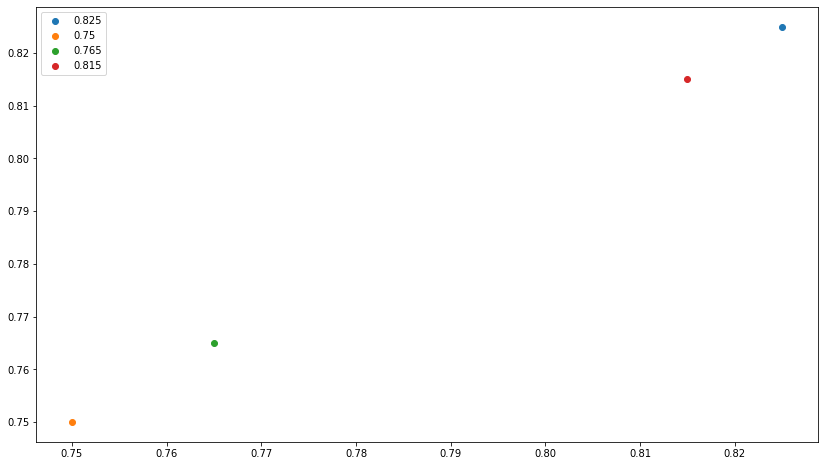

In [29]:
model_list = [model_svm, model_dec, model_gnb, model_log]
plt.figure(figsize=(14,8))

for model in model_list:
    plt.scatter(model,model, label = model)
    plt.legend()

plt.show()

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_log.predict(x_test_vector) , average=None, labels= [Sentiment.POSITIVE, Sentiment.NEUTRAL,Sentiment.NEGATIVE])

array([0.89830508, 0.21428571, 0.11111111])

In [31]:
test_set=['great','bad book', 'horrible','long','nice']
new_test= vectorize.transform(test_set)
clf_log.predict(new_test)

array(['POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE'],
      dtype='<U8')